In [1]:
# Pràctica 4


In [2]:
# Model 6
# Admetent que la resistència que l'aire oposa a la caiguda
# d'un paracaigudes és proporcional al quadrat de la seva velocitat,
# calculeu l'expressió de la velocitat en funció del temps, i el
# límit d'aquesta quan el temps tendeix a infinit.



In [ ]:
# La resistència es una força. Hem de plantejar el problema en termes de força. 
# 
# La força que experimentarà la persona serà la gravetat menys la resistència de l'aire 
# que diem que és proporcional al quadrat de la seva velocitat. Per tant la seva velocitat variarà com
#
# m v'[t] == m g - K v[t]^2
#
# Mirem de resoldre les equacions diferencials sense ajuda del SAGE
#

In [79]:
var("v t dv dt g m K");eq1=m*dv/dt==m*g-K*v^2

In [80]:
# Mirem si podem separar variables


In [81]:
solve(eq1,dv)

[dv == -(K*dt*v^2 - dt*g*m)/m]

In [82]:
# Mirem si podem factoritzar la part dreta


In [83]:
factor(_[0].rhs())

-(K*v^2 - g*m)*dt/m

In [84]:
# Passem totes les v's a l'esquerra i ara si ens ajudem del SAGE per fer les integrals, 
# i podem reduir una de les constants si diem k=K/m. Ens ajudem del SAGE, la integral 
# es resolubre manualment però no tan trivial com els casos anteriors.
#
#    dv/(g*m-K*v^2)= (1/m)dt

# Veiem si el SAGE sap resoldre això


In [85]:
v1=function('v1')(t);var("k");assume(g*k>0);sol0=desolve(diff(v1,t)==g-k*v1^2,[v1,t]);sol0

-1/2*log((k*v1(t) - sqrt(g*k))/(k*v1(t) + sqrt(g*k)))/sqrt(g*k) == _C + t

In [86]:
show(sol0)

-1/2*log((k*v1(t) - sqrt(g*k))/(k*v1(t) + sqrt(g*k)))/sqrt(g*k) == _C + t

In [87]:
sol0.substitute(t=0,v1(t)=0)

SyntaxError: keyword can't be an expression (<ipython-input-87-bfe64f8f8573>, line 1)

In [88]:
solve(sol0,v1(t))

[v1(t) == -(sqrt(g*k)*e^(-2*sqrt(g*k)*_C - 2*sqrt(g*k)*t) + sqrt(g*k))/(k*e^(-2*sqrt(g*k)*_C - 2*sqrt(g*k)*t) - k)]

In [56]:
var("C");-1/2*log((k*0 - sqrt(g*k))/(k*0 + sqrt(g*k)))/sqrt(g*k) == C + 0

-1/2*I*pi/sqrt(g*k) == C

In [89]:
sol0.substitute(_C=-1/2*I*pi/sqrt(g*k))

-1/2*log((k*v1(t) - sqrt(g*k))/(k*v1(t) + sqrt(g*k)))/sqrt(g*k) == t - 1/2*I*pi/sqrt(g*k)

In [90]:
solve(_,v1(t))

[v1(t) == (sqrt(g*k)*e^(2*sqrt(g*k)*t) - sqrt(g*k))/(k*e^(2*sqrt(g*k)*t) + k)]

In [91]:
show(sol)

[v1(t) == (sqrt(g*k)*e^(2*sqrt(g*k)*t) - sqrt(g*k))/(k*e^(2*sqrt(g*k)*t) + k)]

In [92]:
simplify(sol[0].rhs())

(sqrt(g*k)*e^(2*sqrt(g*k)*t) - sqrt(g*k))/(k*e^(2*sqrt(g*k)*t) + k)

In [93]:
test1=sqrt(g*k)*(e^(2*sqrt(g*k)*t) - 1)/(k*(e^(2*sqrt(g*k)*t) + 1));show(test1)

sqrt(g*k)*(e^(2*sqrt(g*k)*t) - 1)/(k*(e^(2*sqrt(g*k)*t) + 1))

In [94]:
test2=sqrt(g/k)*(e^(sqrt(g*k)*t) -e^(-sqrt(g*k)*t))/(e^(sqrt(g*k)*t) + e^(-sqrt(g*k)*t));show(test2)

sqrt(g/k)*(e^(sqrt(g*k)*t) - e^(-sqrt(g*k)*t))/(e^(sqrt(g*k)*t) + e^(-sqrt(g*k)*t))

In [97]:
test3=sqrt(g/k)*tanh(sqrt(g*k)*t);test3

sqrt(g/k)*tanh(sqrt(g*k)*t)

In [98]:
assume(k>0,g>0);expand(sol[0].rhs()-test1)

sqrt(g)*sqrt(k)*e^(2*sqrt(g)*sqrt(k)*t)/(k*e^(2*sqrt(g)*sqrt(k)*t) + k) - sqrt(g)*sqrt(k)/(k*e^(2*sqrt(g)*sqrt(k)*t) + k) - sqrt(g)*e^(2*sqrt(g)*sqrt(k)*t)/(sqrt(k)*(e^(2*sqrt(g)*sqrt(k)*t) + 1)) + sqrt(g)/(sqrt(k)*(e^(2*sqrt(g)*sqrt(k)*t) + 1))

In [99]:
assume(k>0,g>0);simplify(test2-test1)

sqrt(g/k)*(e^(sqrt(g*k)*t) - e^(-sqrt(g*k)*t))/(e^(sqrt(g*k)*t) + e^(-sqrt(g*k)*t)) - sqrt(g*k)*(e^(2*sqrt(g*k)*t) - 1)/(k*(e^(2*sqrt(g*k)*t) + 1))

In [100]:
assume(k>0,g>0);simplify(test2-test3)

-sqrt(g/k)*tanh(sqrt(g*k)*t) + sqrt(g/k)*(e^(sqrt(g*k)*t) - e^(-sqrt(g*k)*t))/(e^(sqrt(g*k)*t) + e^(-sqrt(g*k)*t))

In [ ]:
# No s'en surt massa be. Tractem de fer-ho nosaltres


In [101]:
var("c1 k v1 t1");integ1=integrate(1/(g-k*v^2),v)==integrate(1,t)+c1;show(integ1)

-1/2*log((k*v - sqrt(g*k))/(k*v + sqrt(g*k)))/sqrt(g*k) == c1 + t

In [378]:
# Obtenim exactament la mateixa solució


In [338]:
# Comprovem la definició de tangent hiperbòlica
#


In [68]:
simplify(sinh(t)-(e^t-e^(-t))/2)

1/2*e^(-t) - 1/2*e^t + sinh(t)

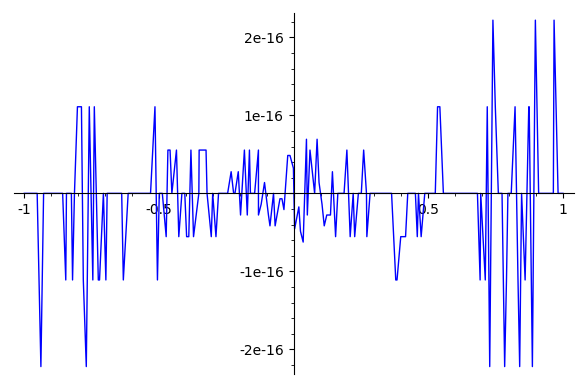

In [96]:
plot(sinh(t)-(e^t-e^(-t))/2,-1,1)

In [30]:
simplify(tanh(t)-(e^t-e^(-t))/(e^t+e^(-t)))

(e^(-t) - e^t)/(e^(-t) + e^t) + tanh(t)

In [31]:
# Tampoc s'en surt. Només ho podem comprobar numèricament


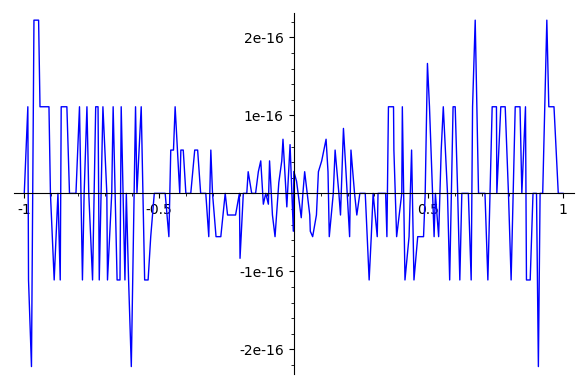

In [32]:
plot(tanh(t)-(e^t-e^(-t))/(e^t+e^(-t)),-1,1)

In [341]:
# Hem tingut que ajudar-lo per qué veure que son expressions equivalents 

In [73]:
sol5=sqrt(g/k)*tanh(sqrt(g*k)*t)

In [102]:
deriv=diff(sol5,t);deriv

-sqrt(g*k)*(tanh(sqrt(g*k)*t)^2 - 1)*sqrt(g/k)

In [103]:
assume(g>0,k>0);simplify(-sqrt(g*k)*(tanh(sqrt(g*k)*t)^2 - 1)*sqrt(g/k))

-sqrt(g*k)*(tanh(sqrt(g*k)*t)^2 - 1)*sqrt(g/k)

In [104]:
deriv=-g*(tanh(sqrt(g*k)*t)^2 - 1)

In [105]:
expand(deriv-(g-k*sol5^2))

0

In [106]:
# Per fi hem aconseguit que ens confirmi que la solució de v'=(g-k*v^2) és v(t)=sqrt(g/k)*tanh(sqrt(g*k)*t)


In [107]:
lim(sol5,t=oo)

sqrt(g/k)

In [247]:
# La k=  K/m és una constant que depen de m (masa del objecte) i K que està relacionat amb la forma i superficie del 
# paracaigudes.
